In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from scipy.integrate import simps
from numpy import trapz
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My_work/Dane/Interferograms/1550-srebro/1.3/W0000.CSV', sep=',', header=None, names=['Wave_Lenght', 'Amplitude'], skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

In [7]:
df.head()

,Wave_Lenght,Amplitude
0,1475.0000,7.976000e-07
1,1475.0198,9.544000e-07
2,1475.0397,5.796000e-07
3,1475.0595,1.106000e-06
4,1475.0794,6.473000e-07


In [8]:
df.describe()

,Wave_Lenght,Amplitude
count,6301.000000,6.301000e+03
mean,1537.500000,2.137221e-04
std,36.092983,2.585698e-04
min,1475.000000,-3.916000e-08
25%,1506.250000,9.494000e-06
50%,1537.500000,9.003000e-05
75%,1568.750000,3.435000e-04
max,1600.000000,9.933000e-04


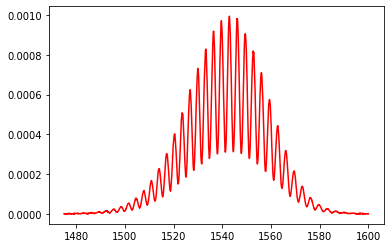

In [9]:
plt.plot(df['Wave_Lenght'], df['Amplitude'], c='r')

In [20]:
def local_max(data):
  peaks, _ = find_peaks(data['Amplitude'])
  df_copy = data.copy()
  df_copy = df_copy.drop(columns=['Amplitude'])
  loc_max = data['Amplitude'][peaks]
  return df_copy.join(loc_max, how='right')

In [38]:
def plot_loc_max(data):
  loc_max = local_max(data)
  plt.plot(data['Wave_Lenght'], data['Amplitude'])
  plt.plot(loc_max['Wave_Lenght'], loc_max['Amplitude'], "x")
  plt.ylabel('Intensity')
  plt.xlabel('Wave lenght')
  plt.show()

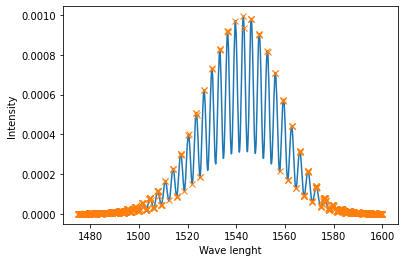

In [39]:
plot_loc_max(df)

In [26]:
max_wave = df['Wave_Lenght'].max()
max_wave

1600.0

In [36]:
df[df['Wave_Lenght'] == 1600]

,Wave_Lenght,Amplitude
6300,1600.0,6.929000e-07


In [27]:
loc_max = local_max(df)
global_max = loc_max['Amplitude'].max()
global_max

0.0009933

In [35]:
df[df['Amplitude'] == 0.0009933]

,Wave_Lenght,Amplitude
3423,1542.9167,0.000993


In [28]:
def filter_by_max_glob(data, x=0.05):
  loc_max = local_max(data)
  global_max = loc_max['Amplitude'].max()
  treshold = x * global_max
  return data[data['Amplitude'] >= treshold].reset_index()

In [29]:
filtered_df = filter_by_max_glob(df)

In [31]:
filtered_df

,index,Wave_Lenght,Amplitude
0,1320,1501.1905,0.000050
1,1321,1501.2103,0.000050
2,1322,1501.2302,0.000050
3,1323,1501.2500,0.000051
4,1324,1501.2698,0.000052
...,...,...,...
3596,5145,1577.0833,0.000054
3597,5146,1577.1032,0.000053
3598,5147,1577.1230,0.000053
3599,5148,1577.1429,0.000051


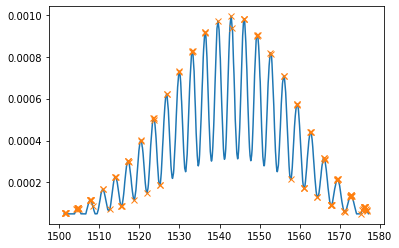

In [30]:
plot_loc_max(filtered_df)

In [41]:
def distance_loc_max(data):
  return data['Wave_Lenght'].diff()

In [42]:
local_max_distance = distance_loc_max(loc_max)

In [43]:
local_max_distance

1          NaN
3       0.0397
6       0.0595
9       0.0596
12      0.0595
         ...  
6285    0.0397
6287    0.0397
6292    0.0992
6295    0.0595
6298    0.0595
Name: Wave_Lenght, Length: 806, dtype: float64

In [53]:
local_max_distance_avg = local_max_distance.mean()
local_max_distance_max = local_max_distance.max()
local_max_distance_min = local_max_distance.min()
local_max_distance_median = local_max_distance.median()
min_wave = filtered_df['Wave_Lenght'].min()
max_wave = filtered_df['Wave_Lenght'].max()

In [47]:
local_max_distance_avg 

0.1552055900621117

In [48]:
local_max_distance_max

3.3134999999999764

In [49]:
local_max_distance_min

0.039599999999836655

In [50]:
local_max_distance_median

0.05950000000007094

In [54]:
min_wave

1501.1905

In [55]:
max_wave

1577.1627

In [56]:
amplitude = global_max - filtered_df['Amplitude'].min()

In [57]:
amplitude

0.0009435399999999999

In [58]:
filtered_df[filtered_df['Amplitude'] == loc_max['Amplitude'].max()]

,index,Wave_Lenght,Amplitude
1924,3423,1542.9167,0.000993
